In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
df_total = pd.read_csv(r'/Users/ngohoanganh/Desktop/COVID19_VN_MOH_MLmodels/predict-LOS(length-of-stay)/assets/processed/df_total.csv', encoding="utf-8")
# remove patients 172, 173, 174 of df_total due to lack of information
df_total = df_total[~(df_total["PATIENT_NO"].isin([172, 173, 174]))]

df_train = pd.read_csv(r'/Users/ngohoanganh/Desktop/COVID19_VN_MOH_MLmodels/predict-LOS(length-of-stay)/assets/processed/df_train.csv', encoding="utf-8")

df_test = pd.read_csv(r'/Users/ngohoanganh/Desktop/COVID19_VN_MOH_MLmodels/predict-LOS(length-of-stay)/assets/processed/df_test.csv', encoding="utf-8")
# remove patients 172, 173, 174 of df_test due to lack of information
df_test = df_test[~(df_test["PATIENT_NO"].isin([172, 173, 174]))]

In [3]:
df_total.info()
df_total.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 170
Data columns (total 17 columns):
PATIENT_NO            171 non-null int64
AGE                   171 non-null float64
SEX                   171 non-null int64
ORIGIN_EUROPE         171 non-null int64
ORIGIN_CHINA          171 non-null int64
ORIGIN_US             171 non-null int64
ORIGIN_ASEAN          171 non-null int64
ORIGIN_DOMESTIC       171 non-null int64
DAYS_OF_ONSET         171 non-null int64
ONSET_FEVER           171 non-null int64
ONSET_COUGH           171 non-null int64
ONSET_TIRED           171 non-null int64
ONSET_SORETHROAT      171 non-null int64
ONSET_RESPIRATORY     171 non-null int64
BACKGROUND_DISEASE    171 non-null int64
HOSPITAL              171 non-null int64
LOS                   20 non-null float64
dtypes: float64(2), int64(15)
memory usage: 24.0 KB


,PATIENT_NO,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL,LOS
166,167,20.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,NaN
167,168,49.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,NaN
168,169,49.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,NaN
169,170,27.0,1,0,0,0,0,1,5,1,0,0,0,0,0,0,NaN
170,171,19.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,NaN


In [4]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 17 columns):
PATIENT_NO            20 non-null int64
AGE                   20 non-null float64
SEX                   20 non-null int64
ORIGIN_EUROPE         20 non-null int64
ORIGIN_CHINA          20 non-null int64
ORIGIN_US             20 non-null int64
ORIGIN_ASEAN          20 non-null int64
ORIGIN_DOMESTIC       20 non-null int64
DAYS_OF_ONSET         20 non-null int64
ONSET_FEVER           20 non-null int64
ONSET_COUGH           20 non-null int64
ONSET_TIRED           20 non-null int64
ONSET_SORETHROAT      20 non-null int64
ONSET_RESPIRATORY     20 non-null int64
BACKGROUND_DISEASE    20 non-null int64
HOSPITAL              20 non-null int64
LOS                   20 non-null int64
dtypes: float64(1), int64(16)
memory usage: 2.7 KB


,PATIENT_NO,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL,LOS
0,1,66.0,1,0,1,0,0,0,6,0,0,0,0,0,2,1,20
1,2,28.0,1,0,1,0,0,0,3,0,0,0,0,0,0,1,12
2,3,25.0,0,0,1,0,0,0,7,0,0,0,0,0,0,0,4
3,4,29.0,1,0,1,0,0,0,9,0,0,0,0,0,0,0,19
4,5,23.0,0,0,1,0,0,0,5,0,0,0,0,0,0,0,11


In [5]:
df_test.info()
df_test.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 17 columns):
PATIENT_NO            151 non-null int64
AGE                   151 non-null float64
SEX                   151 non-null int64
ORIGIN_EUROPE         151 non-null int64
ORIGIN_CHINA          151 non-null int64
ORIGIN_US             151 non-null int64
ORIGIN_ASEAN          151 non-null int64
ORIGIN_DOMESTIC       151 non-null int64
DAYS_OF_ONSET         151 non-null int64
ONSET_FEVER           151 non-null int64
ONSET_COUGH           151 non-null int64
ONSET_TIRED           151 non-null int64
ONSET_SORETHROAT      151 non-null int64
ONSET_RESPIRATORY     151 non-null int64
BACKGROUND_DISEASE    151 non-null int64
HOSPITAL              151 non-null int64
LOS                   0 non-null float64
dtypes: float64(2), int64(15)
memory usage: 21.2 KB


,PATIENT_NO,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL,LOS
146,167,20.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,NaN
147,168,49.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,NaN
148,169,49.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,NaN
149,170,27.0,1,0,0,0,0,1,5,1,0,0,0,0,0,0,NaN
150,171,19.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,NaN


In [6]:
# target variable (LOS)
LOS = df_train['LOS'].values

# extract patient no to build a new dataset for comparision between models
PATIENT_NO_test = df_test['PATIENT_NO']

In [7]:
# split train set and test set (without y_test)
X_train = df_train.drop(columns = ['LOS', 'PATIENT_NO'])

y_train = LOS

X_test = df_test.drop(columns = ['LOS', 'PATIENT_NO'])

In [8]:
X_train.describe()


,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.0,20.00000,20.000000
mean,37.312500,0.400000,0.100000,0.450000,0.050000,0.0,0.400000,4.450000,0.0,0.100000,0.050000,0.050000,0.0,0.15000,0.150000
std,18.727421,0.502625,0.307794,0.510418,0.223607,0.0,0.502625,3.332061,0.0,0.307794,0.223607,0.223607,0.0,0.48936,0.366348
min,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
25%,26.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
50%,29.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.500000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
75%,51.250000,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,7.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
max,73.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,13.000000,0.0,1.000000,1.000000,1.000000,0.0,2.00000,1.000000


In [9]:
X_test.describe()

,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_ASEAN,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_SORETHROAT,ONSET_RESPIRATORY,BACKGROUND_DISEASE,HOSPITAL
count,151.000000,151.000000,151.000000,151.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,34.251656,0.503311,0.602649,0.0,0.059603,0.059603,0.245033,0.973510,0.231788,0.145695,0.026490,0.059603,0.046358,0.039735,0.145695
std,16.443932,0.501653,0.490978,0.0,0.237537,0.237537,0.431538,1.949178,0.423379,0.353975,0.161122,0.237537,0.210958,0.195986,0.353975
min,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,88.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
linear_models = [KNeighborsRegressor(),
                SVR()]

results = [PATIENT_NO_test]

for model in linear_models:
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(X_test)
    results.append(y_test_preds)
    
    # Grab model name and store results associated with model
    # impossible to calculate r2 score dude to lack of y_test
    name = str(model).split("(")[0]
    print('{} finished.'.format(name))

KNeighborsRegressor finished.
SVR finished.


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [11]:
df_results = pd.DataFrame(np.transpose(results))

df_results = df_results.rename(columns={0 : "PATIENT_NO", 
                                        1 : "LOS_KNeighborsRegressor",
                                        2 : "LOS_SVRegression"})

df_results

,PATIENT_NO,LOS_KNeighborsRegressor,LOS_SVRegression
0,17.0,10.0,12.637871
1,19.0,11.2,13.006365
2,20.0,17.0,14.114218
3,23.0,17.0,13.760125
4,24.0,14.6,14.454842
5,25.0,17.0,13.521493
6,26.0,17.0,13.643940
7,27.0,14.0,13.223000
8,28.0,17.0,13.553828
9,29.0,17.0,13.535615


In [12]:
df_results.to_csv(r'./SVR+KNR_models_untuned.csv', index = False)

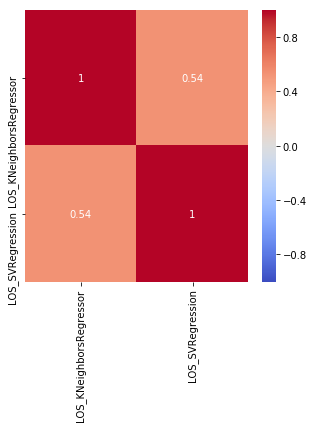

In [13]:
corr_matrix_untuned_results = df_results.drop(columns = ['PATIENT_NO']).corr()

plt.figure(figsize=(5,5))
fig = sns.heatmap(corr_matrix_untuned_results,
            vmin=-1,
            cmap='coolwarm',
            annot=True)
fig.figure.savefig('./corr_matrix_untuned_results.png', bbox_inches = 'tight')

## Parameter tuning for K Neighbors Regressor

In [14]:
KNeighborsRegressor().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [15]:
tuned_parameters_KNR = [{
    'n_neighbors' : [4]
}]

# create and fit a ridge regression model, testing each alpha
reg_model_KNR = KNeighborsRegressor()
grid_KNR = GridSearchCV(reg_model_KNR, tuned_parameters_KNR)
grid_KNR.fit(X_train, y_train)
reg_model_KNR_optimized = grid_KNR.best_estimator_

# summarize the results of the grid search
print(grid_KNR.best_score_)
print(grid_KNR.best_estimator_)

-0.6323068676469784
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [16]:
y_test_preds_KNR = reg_model_KNR_optimized.predict(X_test)

df_results['LOS_KNeighborsRegressor'] = y_test_preds_KNR

## Parameter tuning for Support Vector Regressor

In [17]:
SVR().get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [18]:
tuned_parameters_SVR = [{
    'kernel': ['rbf'],
    'gamma' : [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
    'C': [1, 10, 100, 1000, 10000],
    'epsilon': [1e-4, 1e-3, 0.01, 0.1]
}]

# create and fit a ridge regression model, testing each alpha
reg_model_SVR = SVR()
grid_SVR = GridSearchCV(reg_model_SVR, tuned_parameters_SVR, cv = 5)
grid_SVR.fit(X_train, y_train)
reg_model_SVR_optimized = grid_SVR.best_estimator_

# summarize the results of the grid search
print(grid_SVR.best_score_)
print(grid_SVR.best_estimator_)

-3.9980364896198433
SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [19]:
y_test_preds_SVR = reg_model_SVR_optimized.predict(X_test)

df_results['LOS_SVRegression'] = y_test_preds_SVR

In [20]:
df_results

,PATIENT_NO,LOS_KNeighborsRegressor,LOS_SVRegression
0,17.0,10.75,11.347753
1,19.0,11.25,12.348530
2,20.0,16.75,17.987629
3,23.0,19.00,18.321410
4,24.0,14.75,16.879778
5,25.0,19.00,19.533032
6,26.0,19.00,18.477299
7,27.0,12.75,15.784078
8,28.0,19.00,18.833207
9,29.0,19.00,18.961349


In [21]:
df_results.to_csv(r'./SVR+KNR_models_tuned.csv', index = False)

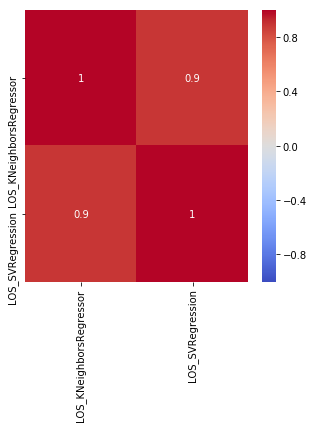

In [22]:
corr_matrix_tuned_results = df_results.drop(columns = ['PATIENT_NO']).corr()

plt.figure(figsize=(5,5))
fig = sns.heatmap(corr_matrix_tuned_results,
            vmin=-1,
            cmap='coolwarm',
            annot=True)
fig.figure.savefig('./corr_matrix_tuned_results.png', bbox_inches = 'tight')